<a href="https://colab.research.google.com/github/rosipapa/colab/blob/main/value_effort_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a Value vs Effort matrix to prioritize the backlog

In [1]:
import pandas as pd
import numpy as np

# Creating a sample dataset with features, impact, and effort
data = {
    'Feature': ['Feature A', 'Feature B', 'Feature C', 'Feature D', 'Feature E', \
                'Feature F', 'Feature G', 'Feature H', 'Feature I', 'Feature J', \
                'Feature K', 'Feature L',  'Feature M', 'Feature N', 'Feature O', \
                'Feature P','Feature Q','Feature R','Feature S','Feature T',\
                'Feature U','Feature V','Feature X','Feature Y','Feature Z',\
                'Feature 1','Feature 2','Feature 3','Feature 4','Feature 5',\
                'Feature 6','Feature 7','Feature 8','Feature 9','Feature 10',\
                'Feature 11','Feature 12','Feature 13','Feature 14','Feature 15'],
    'Impact': np.random.randint(1, 10, size=40),  # Random impact scores (1-10)
    'Effort': np.random.randint(1, 10, size=40),  # Random effort scores (1-10)
}


# Create a DataFrame from the sample data
df = pd.DataFrame(data)


df.loc[df['Feature'] == 'Feature 15', ['Impact', 'Effort']] = [1, 9]
df.loc[df['Feature'] == 'Feature 14', ['Impact', 'Effort']] = [2, 9]

# Display the sample dataset
print(df)


       Feature  Impact  Effort
0    Feature A       6       4
1    Feature B       4       5
2    Feature C       6       3
3    Feature D       3       1
4    Feature E       8       4
5    Feature F       8       7
6    Feature G       9       6
7    Feature H       5       1
8    Feature I       8       2
9    Feature J       5       1
10   Feature K       9       4
11   Feature L       1       3
12   Feature M       4       8
13   Feature N       6       9
14   Feature O       1       7
15   Feature P       6       5
16   Feature Q       4       1
17   Feature R       1       2
18   Feature S       1       2
19   Feature T       3       7
20   Feature U       1       8
21   Feature V       8       6
22   Feature X       1       8
23   Feature Y       3       6
24   Feature Z       5       5
25   Feature 1       7       8
26   Feature 2       1       3
27   Feature 3       8       2
28   Feature 4       5       7
29   Feature 5       2       9
30   Feature 6       2       6
31   Fea

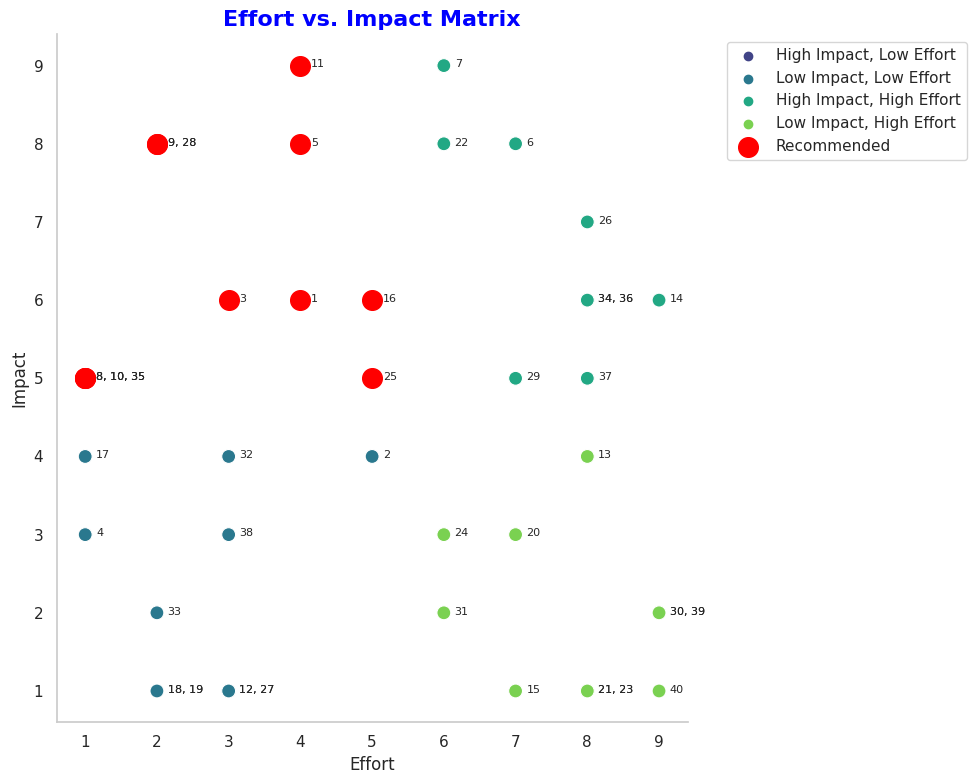

Feature ID and Feature Names Table:
    Feature ID     Feature  Impact  Effort                  Quadrant
1            1   Feature A       6       4   High Impact, Low Effort
2            2   Feature B       4       5    Low Impact, Low Effort
3            3   Feature C       6       3   High Impact, Low Effort
4            4   Feature D       3       1    Low Impact, Low Effort
5            5   Feature E       8       4   High Impact, Low Effort
6            6   Feature F       8       7  High Impact, High Effort
7            7   Feature G       9       6  High Impact, High Effort
8            8   Feature H       5       1   High Impact, Low Effort
9            9   Feature I       8       2   High Impact, Low Effort
10          10   Feature J       5       1   High Impact, Low Effort
11          11   Feature K       9       4   High Impact, Low Effort
12          12   Feature L       1       3    Low Impact, Low Effort
13          13   Feature M       4       8   Low Impact, High Effor

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Add Feature ID column
df['Feature ID'] = range(1, len(df) + 1)

# Concatenate Feature IDs for features with the same value
df['ID_Label'] = df.groupby(['Impact', 'Effort'])['Feature ID'].transform(lambda x: ', '.join(x.astype(str)))

# Quadrant classification
df['Quadrant'] = np.where(
    (df['Impact'] >= df['Impact'].median()) & (df['Effort'] <= df['Effort'].median()), 'High Impact, Low Effort',
    np.where(
        (df['Impact'] >= df['Impact'].median()) & (df['Effort'] >= df['Effort'].median()), 'High Impact, High Effort',
        np.where(
            (df['Impact'] < df['Impact'].median()) & (df['Effort'] <= df['Effort'].median()), 'Low Impact, Low Effort',
            'Low Impact, High Effort'
        )
    )
)

# Create a matrix plot with adjusted label positions
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x='Effort', y='Impact', hue='Quadrant', palette='viridis', s=100)

# Highlight features with high impact and low value
highlighted_features = df[df['Quadrant'] == 'High Impact, Low Effort']
plt.scatter(highlighted_features['Effort'], highlighted_features['Impact'], color='red', marker='o', s=200, label='Recommended')

# Remove the grid
sns.despine()
plt.grid(False)

# Add labels using Feature ID
for _, row in df.iterrows():
    offset_x = 0.15
    offset_y = 0.08

    #Check if there are other features with the same value for both axes
    same_value_features = df[(df['Effort'] == row['Effort']) & (df['Impact'] == row['Impact'])]
    if len(same_value_features) > 1:
        label = row['ID_Label']
        plt.text(row['Effort'] + offset_x, row['Impact'] + offset_y, label, ha='left', va='top', size=8)
    else:
        plt.text(row['Effort'] + offset_x, row['Impact'] + offset_y, str(row['Feature ID']), ha='left',va='top', size=8)

plt.title('Effort vs. Impact Matrix', fontsize=16, fontweight='bold', color='blue')
# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better readability
plt.tight_layout()

# Display the plot
plt.show()

# Display the table with Feature ID and Feature names
feature_table = df[['Feature ID', 'Feature','Impact','Effort', 'Quadrant']].drop_duplicates().sort_values(by='Feature ID')
feature_table.index = range(1, len(feature_table) + 1)
print("Feature ID and Feature Names Table:")
print(feature_table)


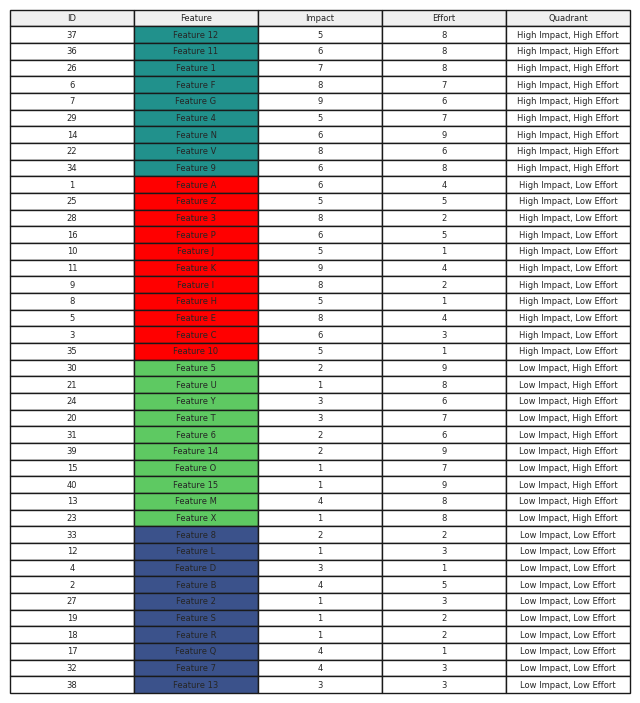

In [7]:
# Convert Quadrant to a categorical variable

# Sort the DataFrame by Quadrant
df = df.sort_values(by=["Quadrant"])

# Plotting the table
fig, ax = plt.subplots(figsize=(8, 5))

colors = {"Low Impact, Low Effort": "#3b528b",
          "High Impact, High Effort": "#21918c",
          "Low Impact, High Effort": "#5ec962",
          "High Impact, Low Effort": "red"}

# Create a table
tab = ax.table(cellText=df[["Feature ID", "Feature", "Impact", "Effort",'Quadrant']].values,
               colLabels=["ID", "Feature", "Impact", "Effort",'Quadrant'],
               cellLoc="center", loc="center",
               colColours=["#f0f0f0"] * 5)

# Apply cell colors based on Quadrant
for i in range(1, len(df)+1):
    tab[(i, 1)].set_facecolor(colors.get(df.iloc[i-1]["Quadrant"], "#f0f0f0"))

# Hide the axes
ax.axis("off")

# Show the table
plt.show()
